In [8]:
import torch
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

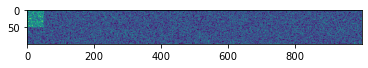

tensor([[1., 1., 1.,  ..., 1., 2., 2.],
        [1., 1., 1.,  ..., 2., 2., 1.],
        [0., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 2., 1., 2.],
        [2., 2., 1.,  ..., 1., 2., 1.],
        [1., 2., 1.,  ..., 1., 1., 1.]])

In [9]:
x  = torch.randint(0, 2, (100, 1000), dtype=torch.float32)

x1 = torch.randint(0, 2, ( 50, 100), dtype=torch.float32)
x2 = torch.randint(0, 2, ( 50,  50), dtype=torch.float32)

x[0:50, : 50] += x2

plt.imshow(x)
plt.show()

y = torch.concat([torch.ones(50), torch.zeros(50)], dim=0)
y = y.type(torch.bool)

is_train = torch.randperm(100) < 80
x = 2 - x
x

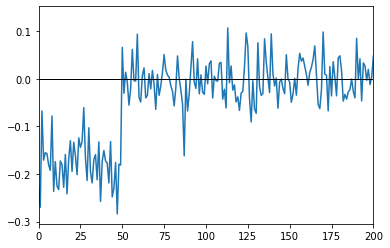

train
[[42  0]
 [ 0 38]]

test
[[ 8  0]
 [ 0 12]]


In [10]:

reg = LogisticRegression()

reg.fit(x[is_train], y[is_train])
plt.plot(reg.coef_[0])
plt.xlim(0, 200)
plt.axhline(0, c='black', lw=1)
plt.show()

print('train')
print(confusion_matrix(reg.predict(x[ is_train]), y[ is_train]))
print()

print('test')
print(confusion_matrix(reg.predict(x[~is_train]), y[~is_train]))

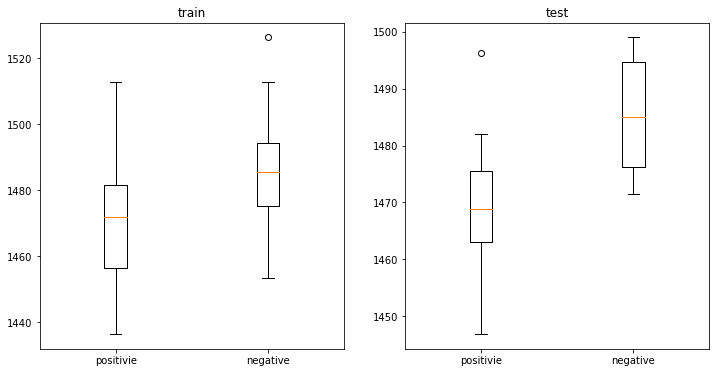

In [11]:
OR = np.exp(reg.coef_[0])
OR = torch.tensor(OR, dtype=torch.float32)

patient_wise_sum = (x.type(torch.FloatTensor) * OR).sum(dim=1)
patient_wise_sum_positive_train = patient_wise_sum[ is_train][ y[ is_train]]
patient_wise_sum_negative_train = patient_wise_sum[ is_train][~y[ is_train]]
patient_wise_sum_positive_test  = patient_wise_sum[~is_train][ y[~is_train]]
patient_wise_sum_negative_test  = patient_wise_sum[~is_train][~y[~is_train]]

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('train')
plt.boxplot(x=[
    patient_wise_sum_positive_train,
    patient_wise_sum_negative_train])
plt.xticks([1, 2], ['positivie', 'negative'])

plt.subplot(1,2,2)
plt.title('test')
plt.boxplot(x=[
    patient_wise_sum_positive_test,
    patient_wise_sum_negative_test])
plt.xticks([1, 2], ['positivie', 'negative'])
plt.show()

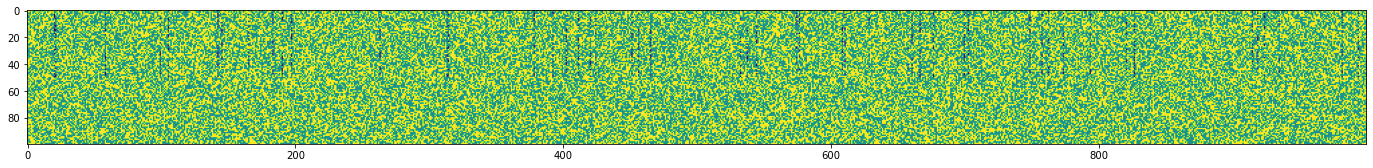

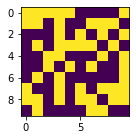

LogisticRegression()

In [12]:
torch.manual_seed(42)

x_shuffled = x[:,torch.randperm(x.shape[-1])]

plt.figure(figsize=(24, 6))
plt.imshow(x_shuffled)
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(x_shuffled[:10, :10])
plt.show()

reg = LogisticRegression()
reg.fit(x[is_train], y[is_train])

In [13]:
from tqdm import tqdm

  0%|          | 0/10 [00:00<?, ?it/s]/Users/shane/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 60%|██████    | 6/10 [00:00<00:00, 56.38it/s]/Users/shane/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

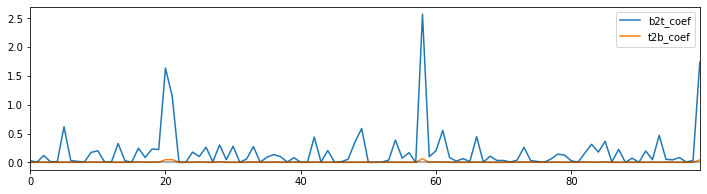

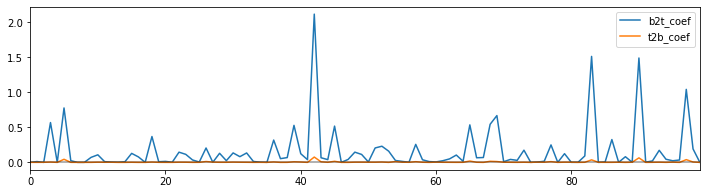

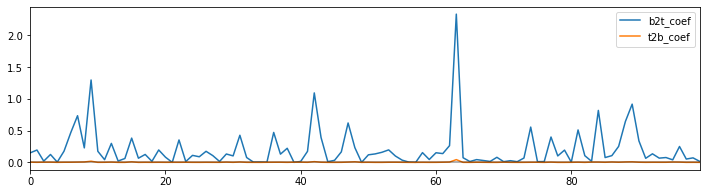

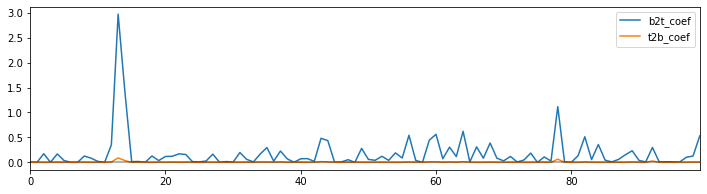

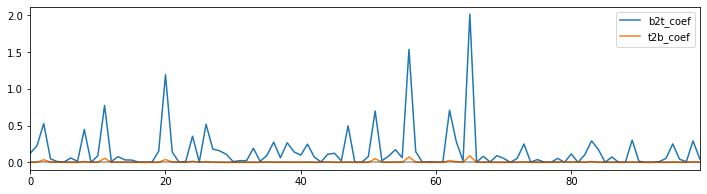

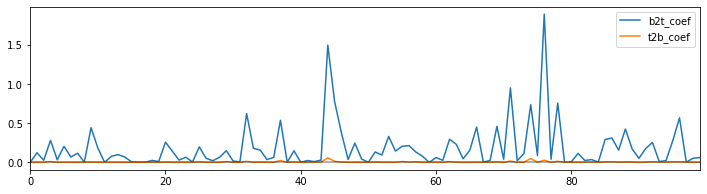

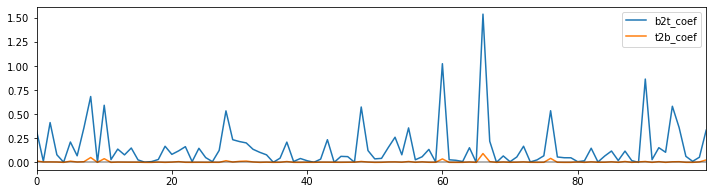

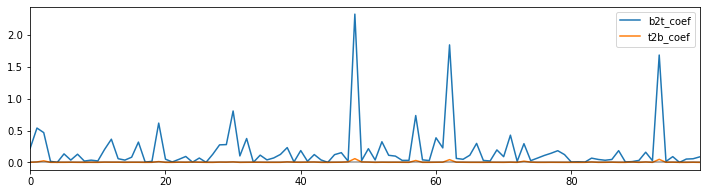

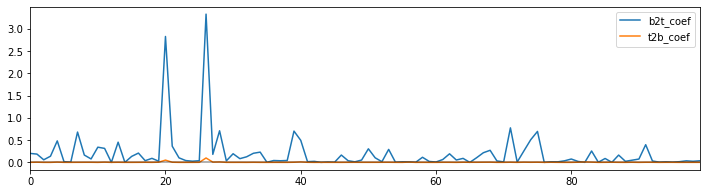

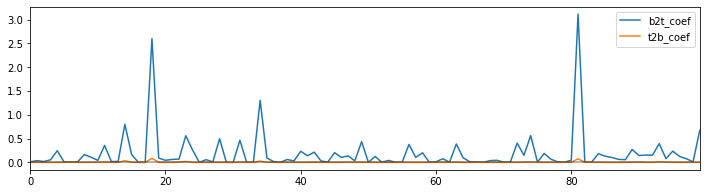

In [14]:
# logistic regression

devided_coefs = []
for i in tqdm(range(0, 10)):
    x_sampled = x_shuffled[:, i*100:(i+1)*100]

    reg = LogisticRegression()
    reg.fit(x_sampled, y)
    devided_coefs.append(reg.coef_[0])

reg = LogisticRegression()
reg.fit(x_shuffled, y)
coef = reg.coef_[0]
coef.shape

for b2t_coef, t2b_coef in zip(devided_coefs, [coef[i*100:(i+1)*100] for i in range(10)]):
    plt.figure(figsize=(12, 3))
    plt.plot((b2t_coef)**2, label='b2t_coef')
    plt.plot((t2b_coef)**2, label='t2b_coef')
    plt.axhline(0, c='k', alpha=.4)
    plt.xlim(0, 99)
    plt.legend()
    plt.show()